In [1]:
import numpy as np
import pandas
import matplotlib
from matplotlib import pyplot
from sklearn import datasets
from sklearn.cluster import Birch, DBSCAN

from L7.pca import PCA
from L3.k_means import KMeans
from L5.knn import KNN
from L5.validation import cross_validation, confusion_matrix

# import L7
# import L7.pca
# from importlib import reload
# reload(L7)
# reload(L7.pca)

In [2]:
iris = datasets.load_iris()
iris_data = np.array(iris.data)

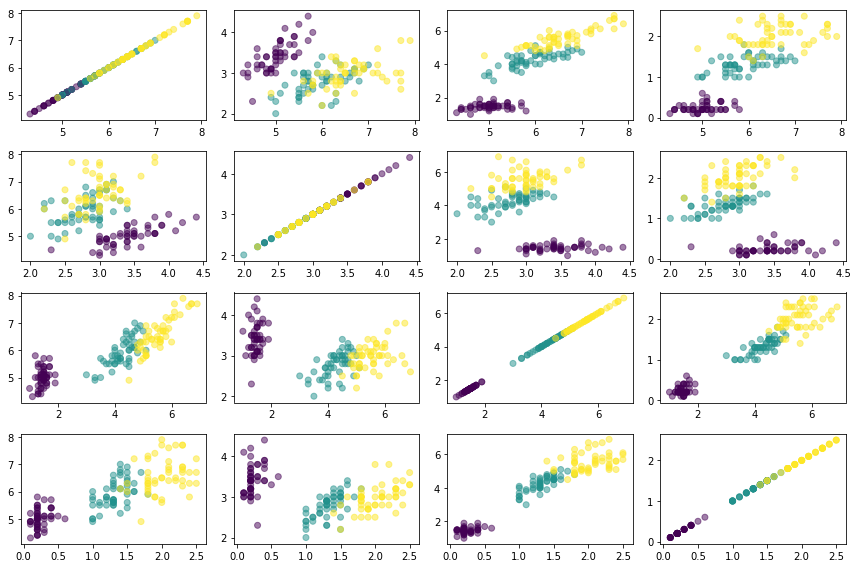

In [64]:
matplotlib.rcParams['figure.figsize'] = [12., 8.]
dimension = iris_data.shape[1]

for i in range(dimension):
    for j in range(dimension):
        pyplot.subplot(dimension, dimension, i*dimension+j+1)
        pyplot.scatter(iris_data[:, i], iris_data[:, j], c=iris.target, marker='o', alpha=0.5)
pyplot.tight_layout()
pyplot.show()

[ 2.93035378  0.92740362  0.14834223  0.02074601]


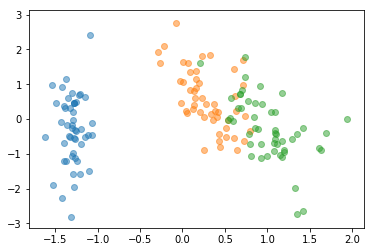

In [4]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]
iris_pca = PCA().fit_transform(iris_data)
print(iris_pca.eigenvalues)

reduced_data = iris_pca.transformed_data.T[:2]

for target in set(iris.target):
    correct_target = (target == iris.target)
    pyplot.scatter(reduced_data[0][correct_target], reduced_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

In [12]:
partition = KMeans(k=3)
partition.fit(reduced_data.T)

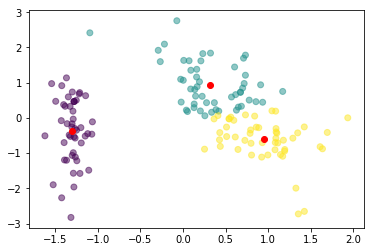

In [13]:
pyplot.scatter(*reduced_data, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T, c="r", marker='o')
pyplot.show()

In [29]:
birch = Birch(threshold=0.5, n_clusters=3)
birch.fit(reduced_data.T)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.5)

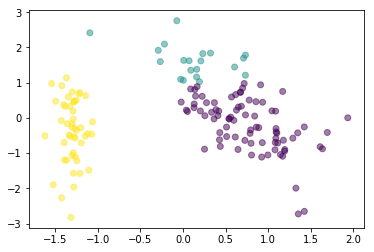

In [30]:
pyplot.scatter(*reduced_data, c=birch.labels_, marker='o', alpha=0.5)
pyplot.show()

In [44]:
dbscan = DBSCAN(eps=.75, min_samples=25)
dbscan.fit(reduced_data.T)

DBSCAN(algorithm='auto', eps=0.75, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=25, n_jobs=1, p=None)

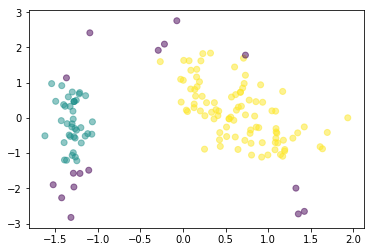

In [45]:
pyplot.scatter(*reduced_data, c=dbscan.labels_, marker='o', alpha=0.5)
pyplot.show()

In [48]:
knn = KNN(k=3).fit(iris.data, iris.target)
print(knn.score(iris.data, iris.target))

0.96


In [49]:
knn_pca = KNN(k=3).fit(reduced_data.T, iris.target)
print(knn_pca.score(reduced_data.T, iris.target))

0.94


In [52]:
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(iris.data, iris.target,
                                            knn_cross_validation)
print(np.array(cross_validation_results))

[ 1.          1.          1.          1.          0.86666667  0.86666667
  1.          0.86666667  0.86666667  1.        ]


In [53]:
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_data.T, iris.target,
                                            knn_cross_validation)
print(np.array(cross_validation_results))

[ 1.          1.          0.93333333  0.73333333  0.86666667  0.73333333
  0.93333333  0.73333333  0.86666667  0.8       ]


In [55]:
confusion = confusion_matrix(KNN(k=3), iris.data, iris.target)
print(confusion)

[[38  0  0]
 [ 0 32  0]
 [ 0  3 27]]


In [56]:
confusion = confusion_matrix(KNN(k=3), reduced_data.T, iris.target)
print(confusion)

[[33  1  0]
 [ 0 26  8]
 [ 0  0 32]]


In [5]:
wine = pandas.read_csv('L3/data/wine.data', sep=',', header=None)
wine_targets = wine.loc[:, 0].values
wine = wine.loc[:, 1:].values
print(wine_targets)
print(wine)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e

In [60]:
def display_wine(wine_data, groups):
    dimension = wine_data.shape[1]
    
    for i in range(dimension):
        pyplot.scatter(wine_data[:, i], wine_data[:, 12], 
               c=groups, alpha=0.5)
        pyplot.show()

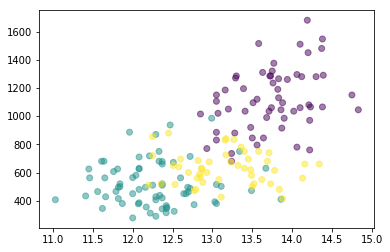

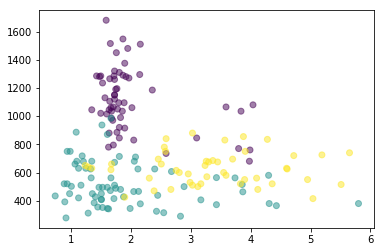

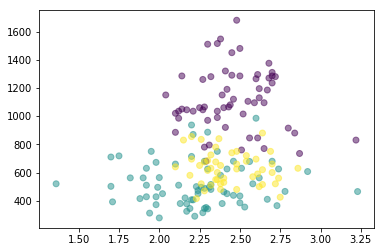

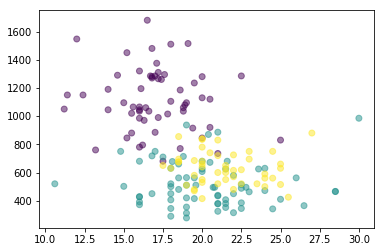

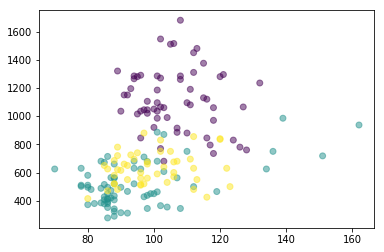

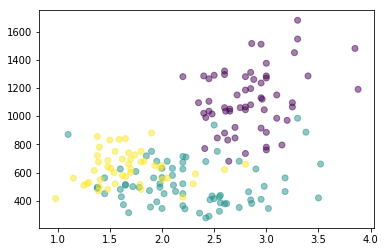

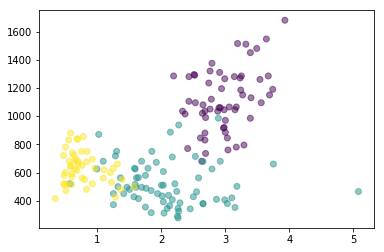

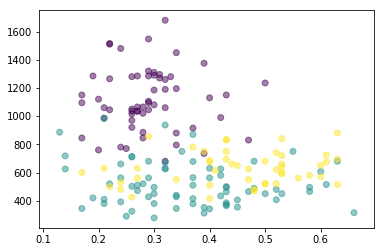

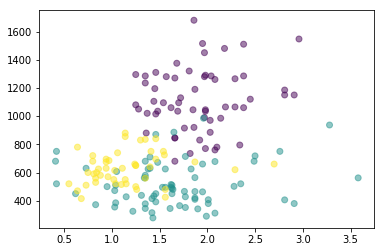

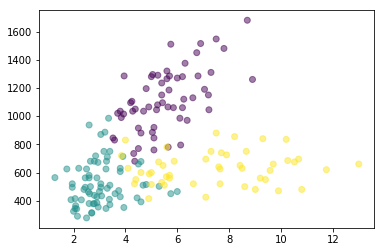

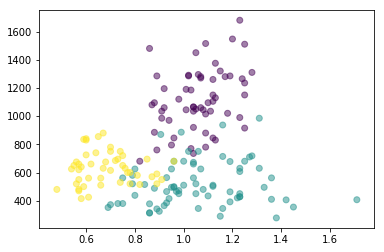

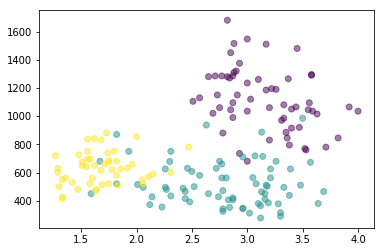

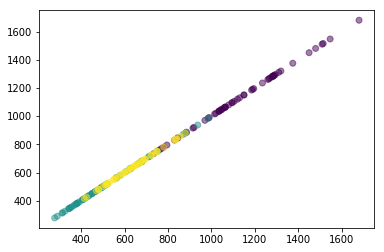

In [62]:
display_wine(wine, wine_targets)

[ 4.73243698  2.51108093  1.45424187  0.92416587  0.85804868  0.64528221
  0.55414147  0.35046627  0.29051203  0.25232001  0.22706428  0.16972374
  0.10396199]


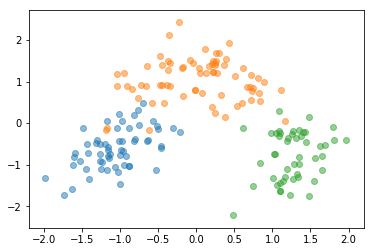

In [6]:
wine_pca = PCA().fit_transform(wine)
print(wine_pca.eigenvalues)

reduced_wine_data = wine_pca.transformed_data.T[:2]

for target in set(wine_targets):
    correct_target = (target == wine_targets)
    pyplot.scatter(reduced_wine_data[0][correct_target], 
                   reduced_wine_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

In [68]:
partition = KMeans(k=3)
partition.fit(reduced_wine_data.T)

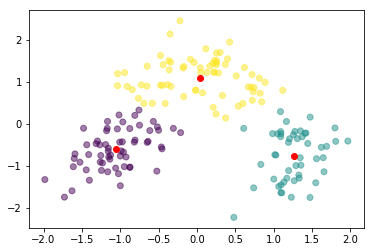

In [69]:
pyplot.scatter(*reduced_wine_data, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T, c="r", marker='o')
pyplot.show()

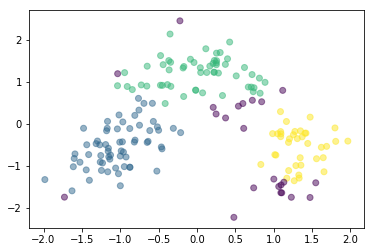

In [82]:
dbscan = DBSCAN(eps=.6, min_samples=25)
dbscan.fit(reduced_wine_data.T)
pyplot.scatter(*reduced_wine_data, c=dbscan.labels_, marker='o', alpha=0.5)
pyplot.show()

In [83]:
knn = KNN(k=3).fit(wine, wine_targets)
print(knn.score(wine, wine_targets))
knn_pca = KNN(k=3).fit(reduced_wine_data.T, wine_targets)
print(knn_pca.score(reduced_wine_data.T, wine_targets))

0.870786516854
0.966292134831


In [85]:
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(wine, wine_targets,
                                            knn_cross_validation)
print(np.array(cross_validation_results))
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_wine_data.T, wine_targets,
                                            knn_cross_validation)
print(np.array(cross_validation_results))

[ 0.94117647  0.77777778  0.77777778  0.61111111  0.55555556  0.70588235
  0.83333333  0.66666667  0.44444444  0.33333333]
[ 1.          0.88888889  0.88888889  1.          0.77777778  0.94117647
  0.94444444  0.88888889  1.          1.        ]


In [86]:
confusion = confusion_matrix(KNN(k=3), wine, wine_targets)
print(confusion)
confusion = confusion_matrix(KNN(k=3), reduced_wine_data.T, wine_targets)
print(confusion)

[[33  0  6]
 [ 4 28 17]
 [ 1 12 18]]
[[42  0  0]
 [ 2 43  1]
 [ 0  0 31]]


In [7]:
glass = pandas.read_csv('L3/data/glass.data', sep=',', header=None)
glass_labels = glass.loc[:, 10].values
glass_data = glass.loc[:, 1:10].values
print(glass_data)
print(glass_labels)

[[  1.52101  13.64      4.49    ...,   0.        0.        1.     ]
 [  1.51761  13.89      3.6     ...,   0.        0.        1.     ]
 [  1.51618  13.53      3.55    ...,   0.        0.        1.     ]
 ..., 
 [  1.52065  14.36      0.      ...,   1.64      0.        7.     ]
 [  1.51651  14.38      0.      ...,   1.57      0.        7.     ]
 [  1.51711  14.23      0.      ...,   1.67      0.        7.     ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


[  3.06994294e+00   2.30209539e+00   1.41604105e+00   1.17180145e+00
   9.18376172e-01   5.49992529e-01   3.71169347e-01   1.83531870e-01
   6.23822552e-02   1.61534547e-03]


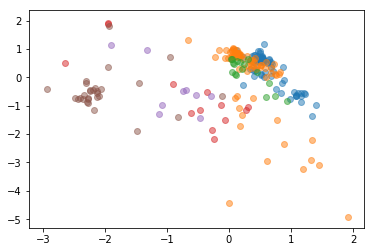

In [8]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]
glass_pca = PCA().fit_transform(glass_data)
print(glass_pca.eigenvalues)

reduced_glass_data = glass_pca.transformed_data.T[:2]
reduced_glass_data_4d = glass_pca.transformed_data.T[:4]

for target in set(glass_labels):
    correct_target = (target == glass_labels)
    pyplot.scatter(reduced_glass_data[0][correct_target], 
                   reduced_glass_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

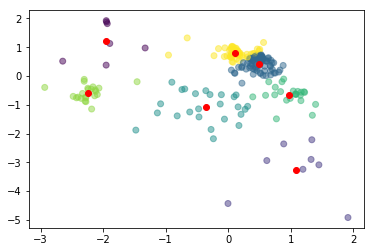

In [93]:
partition = KMeans(k=7)
partition.fit(reduced_glass_data.T)
pyplot.scatter(*reduced_glass_data, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T, c="r", marker='o')
pyplot.show()

In [2]:
def plot_multidimension(data, target, dimension):
    matplotlib.rcParams['figure.figsize'] = [12., 8.]
    
    for i in range(dimension):
        for j in range(dimension):
            pyplot.subplot(dimension, dimension, i*dimension+j+1)
            pyplot.scatter(data[:, i], data[:, j], c=target, marker='o', alpha=0.5)
    pyplot.tight_layout()
    pyplot.show()
    matplotlib.rcParams['figure.figsize'] = [6., 4.]

/home/lukasz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


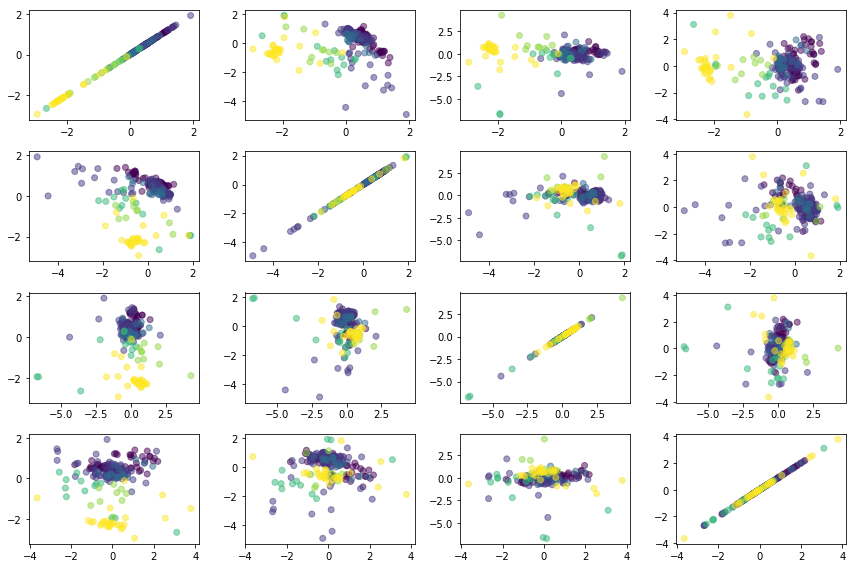

In [101]:
plot_multidimension(reduced_glass_data_4d.T, glass_labels, dimension=4)

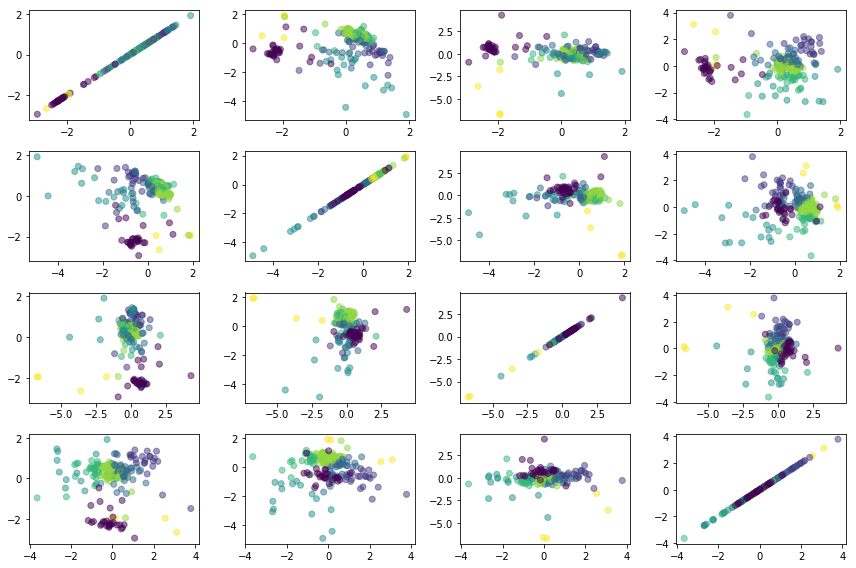

In [102]:
partition = KMeans(k=7)
partition.fit(reduced_glass_data_4d.T)
plot_multidimension(reduced_glass_data_4d.T, partition.groups, dimension=4)

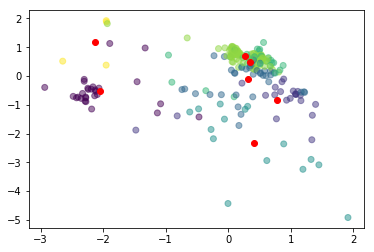

In [105]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]
pyplot.scatter(*reduced_glass_data, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T[:2], c="r", marker='o')
pyplot.show()

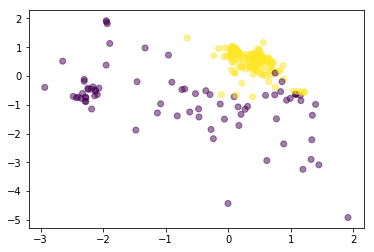

In [110]:
dbscan = DBSCAN(eps=1, min_samples=25)
dbscan.fit(reduced_glass_data_4d.T)
pyplot.scatter(*reduced_glass_data, c=dbscan.labels_, marker='o', alpha=0.5)
pyplot.show()

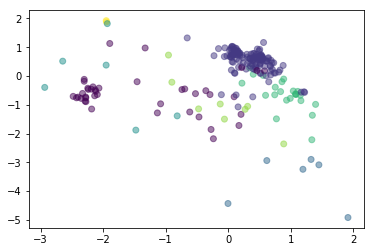

In [115]:
birch = Birch(threshold=0.25, n_clusters=7)
birch.fit(reduced_glass_data_4d.T)
pyplot.scatter(*reduced_glass_data, c=birch.labels_, marker='o', alpha=0.5)
pyplot.show()

In [116]:
knn = KNN(k=3).fit(glass_data, glass_labels)
print(knn.score(glass_data, glass_labels))
knn_pca = KNN(k=3).fit(reduced_glass_data.T, glass_labels)
print(knn_pca.score(reduced_glass_data.T, glass_labels))
knn_pca_4d = KNN(k=3).fit(reduced_glass_data_4d.T, glass_labels)
print(knn_pca_4d.score(reduced_glass_data_4d.T, glass_labels))

0.981308411215
0.841121495327
0.869158878505


In [120]:
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(glass_data, glass_labels,
                                            knn_cross_validation)
print(np.array(cross_validation_results))
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_glass_data.T, glass_labels,
                                            knn_cross_validation)
print(np.array(cross_validation_results))
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_glass_data_4d.T, glass_labels,
                                            knn_cross_validation)
print(np.array(cross_validation_results))

[ 1.          1.          1.          1.          0.86363636  1.          1.
  0.77272727  0.47619048  0.90909091]
[ 0.80952381  0.9047619   0.77272727  0.95238095  0.63636364  0.66666667
  0.61904762  0.22727273  0.19047619  0.95454545]
[ 0.66666667  0.95238095  0.68181818  0.9047619   0.54545455  0.52380952
  0.47619048  0.13636364  0.23809524  0.95454545]


In [122]:
confusion = confusion_matrix(KNN(k=3), glass_data, glass_labels)
print(confusion, "\n")
confusion = confusion_matrix(KNN(k=3), reduced_glass_data.T, glass_labels)
print(confusion, "\n")
confusion = confusion_matrix(KNN(k=3), reduced_glass_data_4d.T, glass_labels)
print(confusion, "\n")

[[49  1  0  0  0  0]
 [ 1 47  0  0  0  0]
 [ 0  0 11  0  0  0]
 [ 0  0  0  8  1  0]
 [ 0  0  0  2  2  3]
 [ 0  0  0  0  1 17]] 

[[33 15  0  0  0  0]
 [ 4 41  0  2  0  0]
 [ 5  5  3  0  0  0]
 [ 0  4  0  3  0  0]
 [ 1  2  0  6  0  0]
 [ 0  3  0  0  0 16]] 

[[35 15  0  0  0  0]
 [13 33  0  4  0  0]
 [ 6  5  0  0  0  0]
 [ 0  2  0  6  0  0]
 [ 0  0  0  0  3  2]
 [ 1  1  0  1  0 16]] 



In [9]:
customers = pandas.read_csv('L3/data/Wholesale_customers.data', sep=',', header=None)
customers_targets_1 = customers.loc[:, 0].values
customers_targets_2 = customers.loc[:, 1].values
customers_data = customers.loc[:, 2:].values
print(customers_data, customers_targets_1, customers_targets_2, sep="\n\n")

[[12669  9656  7561   214  2674  1338]
 [ 7057  9810  9568  1762  3293  1776]
 [ 6353  8808  7684  2405  3516  7844]
 ..., 
 [14531 15488 30243   437 14841  1867]
 [10290  1981  2232  1038   168  2125]
 [ 2787  1698  2510    65   477    52]]

[2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 1 2 1 1 2 2 2 1 1 2 1 1 1 1 1 1 2 1
 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 2 2 1 1 2 2 1 1 2 2 2 2 1 2 1 2 1 1 1 1 1 2
 2 1 1 2 1 1 1 2 2 1 2 2 2 1 1 1 1 1 2 1 2 1 2 1 1 1 2 2 2 1 1 1 2 2 2 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 1 1 1 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 2 2 1 1 1 2 1 2 1 2 1 2 1 1 2 1 2 1 2 1 1 1
 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2
 1 2 2 1 2 2 2 2 2 2 2 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1
 2 2 2 1 1 1 1 2 2 1 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1
 2 1 1 

[ 2.65099857  1.70646229  0.74175057  0.56501435  0.28632709  0.06311455]


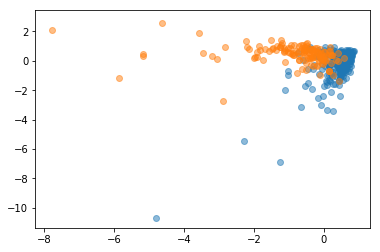

In [11]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]
customers_pca = PCA().fit_transform(customers_data)
print(customers_pca.eigenvalues)

reduced_customers_data = customers_pca.transformed_data.T[:2]
reduced_customers_data_4d = customers_pca.transformed_data.T[:4]

for target in set(customers_targets_1):
    correct_target = (target == customers_targets_1)
    pyplot.scatter(reduced_customers_data[0][correct_target], 
                   reduced_customers_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

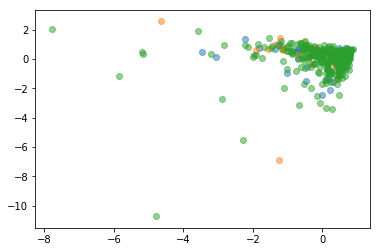

In [124]:
for target in set(glass_labels):
    correct_target = (target == customers_targets_2)
    pyplot.scatter(reduced_customers_data[0][correct_target], 
                   reduced_customers_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

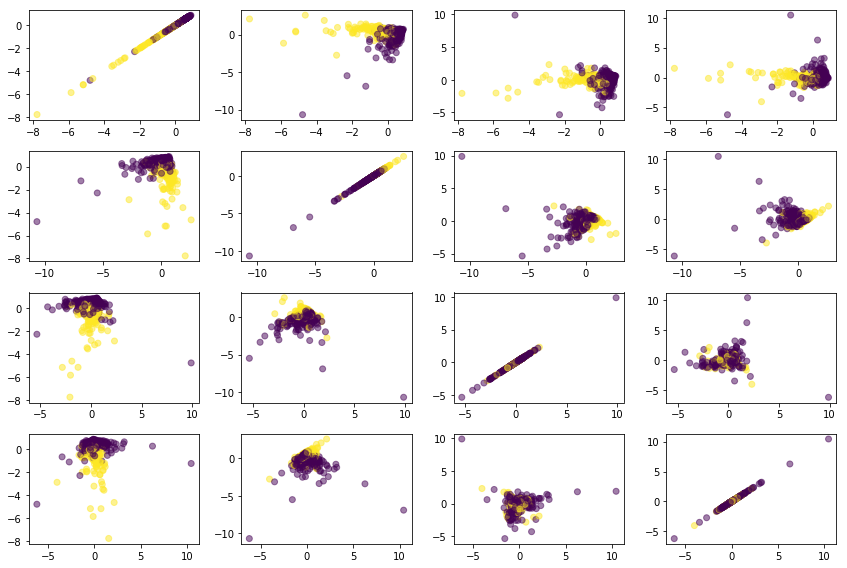

In [125]:
plot_multidimension(reduced_customers_data_4d.T, customers_targets_1, dimension=4)

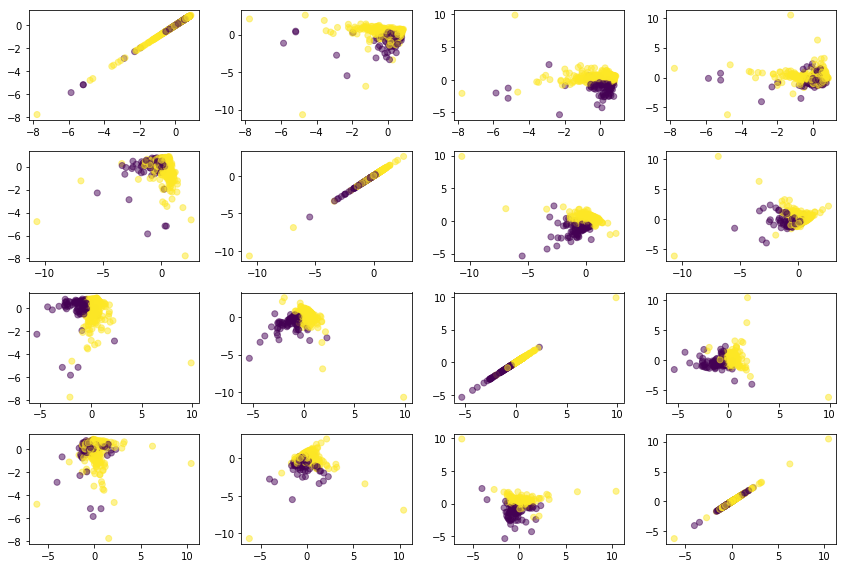

In [18]:
partition = KMeans(k=2)
partition.fit(reduced_customers_data_4d.T)
plot_multidimension(reduced_customers_data_4d.T, partition.groups, dimension=4)

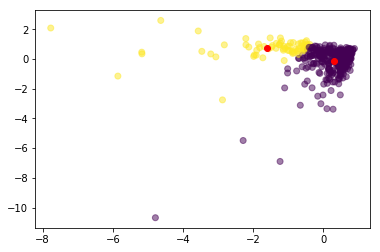

In [19]:
partition = KMeans(k=2)
partition.fit(reduced_customers_data.T)
pyplot.scatter(*reduced_customers_data, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T, c="r", marker='o')
pyplot.show()

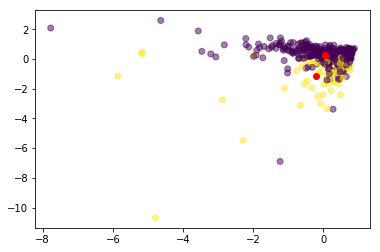

In [27]:
partition = KMeans(k=2)
partition.fit(reduced_customers_data_4d.T)
pyplot.scatter(*reduced_customers_data, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T[:2], c="r", marker='o')
pyplot.show()

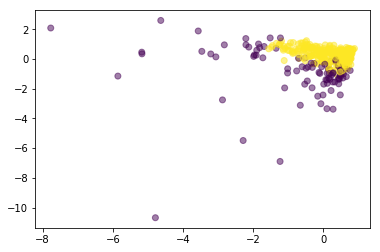

In [30]:
dbscan = DBSCAN(eps=.75, min_samples=25)
dbscan.fit(reduced_customers_data_4d.T)
pyplot.scatter(*reduced_customers_data, c=dbscan.labels_, marker='o', alpha=0.5)
pyplot.show()

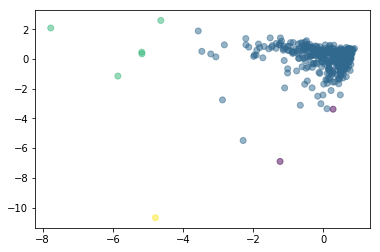

In [39]:
birch = Birch(threshold=2, n_clusters=4)
birch.fit(reduced_customers_data_4d.T)
pyplot.scatter(*reduced_customers_data, c=birch.labels_, marker='o', alpha=0.5)
pyplot.show()

In [40]:
knn = KNN(k=3).fit(customers_data, customers_targets_1)
print(knn.score(customers_data, customers_targets_1))
knn_pca = KNN(k=3).fit(reduced_customers_data.T, customers_targets_1)
print(knn_pca.score(reduced_customers_data.T, customers_targets_1))
knn_pca_4d = KNN(k=3).fit(reduced_customers_data_4d.T, customers_targets_1)
print(knn_pca_4d.score(reduced_customers_data_4d.T, customers_targets_1))

0.945454545455
0.927272727273
0.922727272727


In [41]:
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(customers_data, customers_targets_1,
                                            knn_cross_validation)
print(np.array(cross_validation_results))
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_customers_data.T, customers_targets_1,
                                            knn_cross_validation)
print(np.array(cross_validation_results))
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_customers_data_4d.T, customers_targets_1,
                                            knn_cross_validation)
print(np.array(cross_validation_results))

[ 0.88636364  0.88636364  0.95454545  0.90909091  0.81818182  0.84090909
  0.95454545  0.95454545  0.95454545  0.84090909]
[ 0.79545455  0.90909091  0.95454545  0.86363636  0.88636364  0.84090909
  0.84090909  0.93181818  0.86363636  0.84090909]
[ 0.79545455  0.90909091  0.93181818  0.95454545  0.86363636  0.88636364
  0.95454545  0.90909091  0.88636364  0.86363636]


In [42]:
confusion = confusion_matrix(KNN(k=3), customers_data, customers_targets_1)
print(confusion, "\n")
confusion = confusion_matrix(KNN(k=3), reduced_customers_data.T, customers_targets_1)
print(confusion, "\n")
confusion = confusion_matrix(KNN(k=3), reduced_customers_data_4d.T, customers_targets_1)
print(confusion, "\n")

[[182  19]
 [ 18  75]] 

[[182  21]
 [  8  83]] 

[[195  17]
 [ 15  67]] 



In [3]:
studying = pandas.read_csv('L3/data/Data_User_Modeling_Dataset.dat', sep=',', header=None)
studying_target = pandas.read_csv('L7/data/Data_User_Modeling_Dataset_target.dat', 
                                  sep=',', header=None).values.T[0]
studying_data = studying.values[1:]
print(studying_data, studying_data.shape)
print(studying_target, studying_target.shape)

[[ 0.08  0.08  0.1   0.24  0.9 ]
 [ 0.06  0.06  0.05  0.25  0.33]
 [ 0.1   0.1   0.15  0.65  0.3 ]
 ..., 
 [ 0.54  0.82  0.71  0.29  0.77]
 [ 0.5   0.75  0.81  0.61  0.26]
 [ 0.66  0.9   0.76  0.87  0.74]] (257, 5)
[3 1 2 1 2 2 0 1 3 3 1 2 3 2 3 0 1 1 2 1 2 2 1 1 3 0 1 3 3 2 1 1 3 3 1 1 1
 0 2 1 3 2 2 0 2 2 3 3 2 1 2 1 3 2 1 2 2 3 1 1 2 2 1 2 0 0 2 1 2 2 3 0 2 3
 0 1 1 0 1 1 2 2 1 1 0 3 1 1 2 2 2 0 1 3 1 1 3 2 1 1 3 2 1 1 2 2 2 2 3 1 1
 3 3 2 2 0 3 2 3 1 1 1 2 3 3 3 1 1 2 1 2 0 3 2 2 1 1 2 1 0 2 2 1 2 3 1 0 1
 3 3 1 0 1 2 2 2 3 2 2 1 2 3 3 0 3 2 3 1 3 1 2 3 1 2 1 1 3 2 3 1 3 3 1 1 1
 3 2 1 3 2 3 2 3 2 1 0 1 2 0 0 2 0 1 3 1 2 2 0 3 2 2 3 2 2 1 1 3 2 1 1 2 2
 2 1 3 2 1 3 3 2 1 1 3 2 1 1 3 2 2 1 3 2 1 2 3 2 1 3 2 2 2 1 3 2 3 2 3] (257,)


[ 1.38237934  1.18026434  0.98274942  0.91496358  0.55917457]


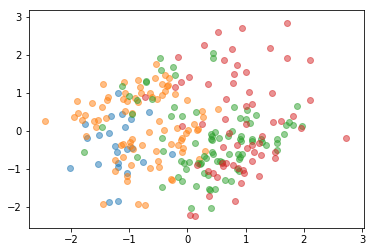

In [41]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]
studying_pca = PCA().fit_transform(studying_data)
print(studying_pca.eigenvalues)

reduced_studying_data = studying_pca.transformed_data.T[:2]

for target in set(studying_target):
    correct_target = (target == studying_target)
    pyplot.scatter(reduced_studying_data[0][correct_target], 
                   reduced_studying_data[1][correct_target], 
                   alpha=0.5)
pyplot.show()

[ 1.38237934  1.18026434  0.98274942  0.91496358  0.55917457]


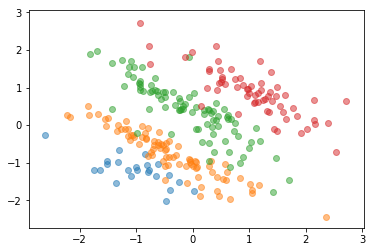

In [45]:
matplotlib.rcParams['figure.figsize'] = [6., 4.]
studying_pca_old = PCA().fit(studying_data)
print(studying_pca_old.eigenvalues)

reduced_studying_data_old = studying_pca_old.transformed_data.T[[4, 0]]

for target in set(studying_target):
    correct_target = (target == studying_target)
    pyplot.scatter(reduced_studying_data_old[0][correct_target], 
                   reduced_studying_data_old[1][correct_target], 
                   alpha=0.5)
pyplot.show()  # TODO: To jest lepsze?

In [18]:
print(studying_data.shape)

(257, 5)


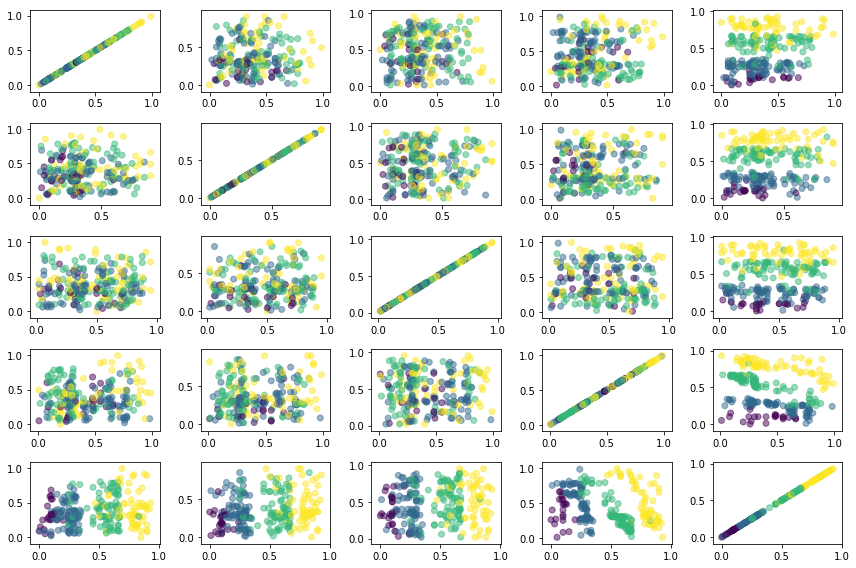

In [4]:
plot_multidimension(studying_data, studying_target, dimension=5)

/home/lukasz/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


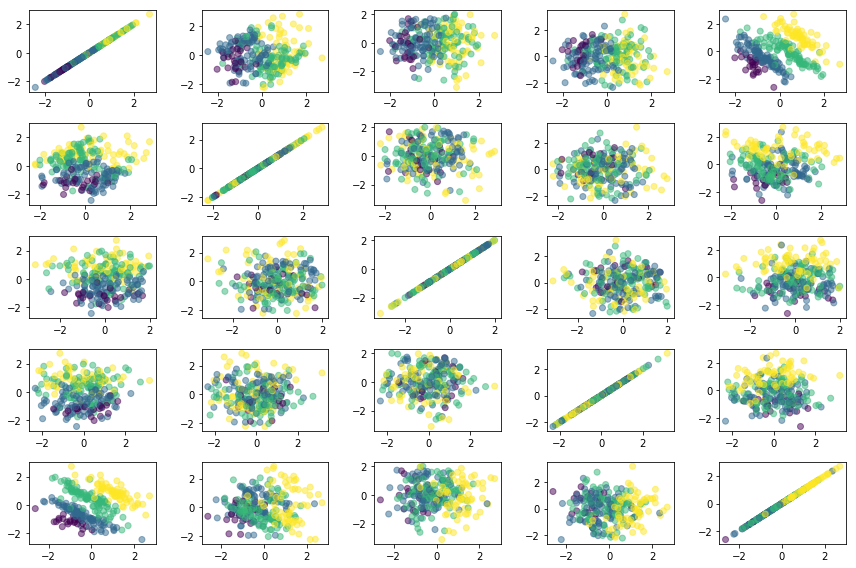

In [30]:
plot_multidimension(studying_pca.transformed_data, studying_target, dimension=5)

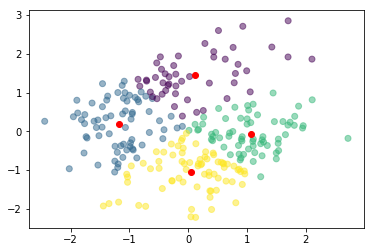

In [43]:
partition = KMeans(k=4)
partition.fit(reduced_studying_data.T)
pyplot.scatter(*reduced_studying_data, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T, c="r", marker='o')
pyplot.show()

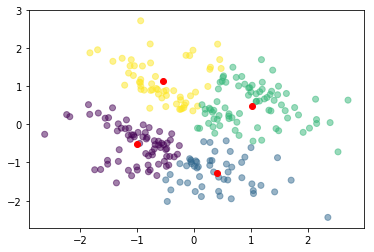

In [48]:
partition = KMeans(k=4)
partition.fit(reduced_studying_data_old.T)
pyplot.scatter(*reduced_studying_data_old, c=partition.groups, marker='o', alpha=0.5)
pyplot.scatter(*partition.group_centers.T, c="r", marker='o')
pyplot.show()

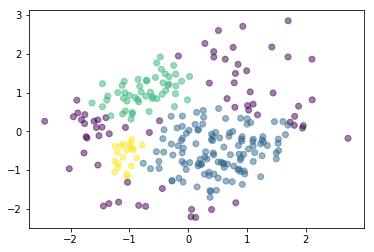

In [63]:
dbscan = DBSCAN(eps=.55, min_samples=25)
dbscan.fit(reduced_studying_data.T)
pyplot.scatter(*reduced_studying_data, c=dbscan.labels_, marker='o', alpha=0.5)
pyplot.show()

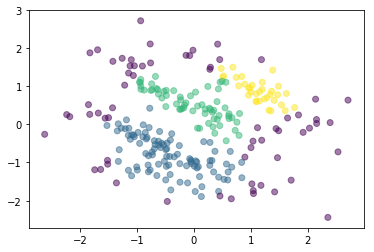

In [64]:
dbscan = DBSCAN(eps=.55, min_samples=25)
dbscan.fit(reduced_studying_data_old.T)
pyplot.scatter(*reduced_studying_data_old, c=dbscan.labels_, marker='o', alpha=0.5)
pyplot.show()

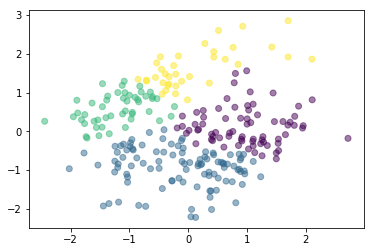

In [65]:
birch = Birch(threshold=.5, n_clusters=4)
birch.fit(reduced_studying_data.T)
pyplot.scatter(*reduced_studying_data, c=birch.labels_, marker='o', alpha=0.5)
pyplot.show()

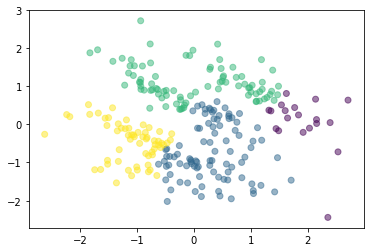

In [66]:
birch = Birch(threshold=.5, n_clusters=4)
birch.fit(reduced_studying_data_old.T)
pyplot.scatter(*reduced_studying_data_old, c=birch.labels_, marker='o', alpha=0.5)
pyplot.show()

In [73]:
knn = KNN(k=3).fit(studying_data, studying_target)
print(knn.score(studying_data, studying_target))
knn_pca = KNN(k=3).fit(reduced_studying_data.T, studying_target)
print(knn_pca.score(reduced_studying_data.T, studying_target))
knn_pca_4d = KNN(k=3).fit(reduced_studying_data_old.T, studying_target)
print(knn_pca_4d.score(reduced_studying_data_old.T, studying_target))

0.910505836576
0.770428015564
0.926070038911


In [74]:
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(studying_data, studying_target,
                                            knn_cross_validation)
print(np.array(cross_validation_results))
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_studying_data.T, studying_target,
                                            knn_cross_validation)
print(np.array(cross_validation_results))
knn_cross_validation = KNN(k=3)
cross_validation_results = cross_validation(reduced_studying_data_old.T, studying_target,
                                            knn_cross_validation)
print(np.array(cross_validation_results))

[ 0.88        0.88461538  0.65384615  0.88        0.76923077  0.73076923
  0.92        0.69230769  0.80769231  0.80769231]
[ 0.4         0.46153846  0.53846154  0.52        0.53846154  0.53846154
  0.64        0.5         0.80769231  0.73076923]
[ 0.84        0.96153846  0.84615385  0.88        0.88461538  0.96153846
  1.          0.88461538  0.96153846  0.88461538]


In [75]:
confusion = confusion_matrix(KNN(k=3), studying_data, studying_target)
print(confusion, "\n")
confusion = confusion_matrix(KNN(k=3), reduced_studying_data.T, studying_target)
print(confusion, "\n")
confusion = confusion_matrix(KNN(k=3), reduced_studying_data_old.T, studying_target)
print(confusion, "\n")

[[ 4 13  0  0]
 [ 2 41  1  0]
 [ 0 20 44  1]
 [ 0  3 15 28]] 

[[ 2 13  0  0]
 [13 38  6  0]
 [ 1 14 25 20]
 [ 0  8 14 18]] 

[[10  3  0  0]
 [ 1 52  1  0]
 [ 0  7 53  1]
 [ 0  0  5 39]] 

